<a href="https://www.kaggle.com/code/pranavkode142001/ml-wine-quality?scriptVersionId=296432328" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

In [2]:
data_url = '/kaggle/input/winequalityred/winequality-red.csv'
data = pd.read_csv(data_url, sep=";")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
features_list = data.columns.tolist()
print(features_list)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
data['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

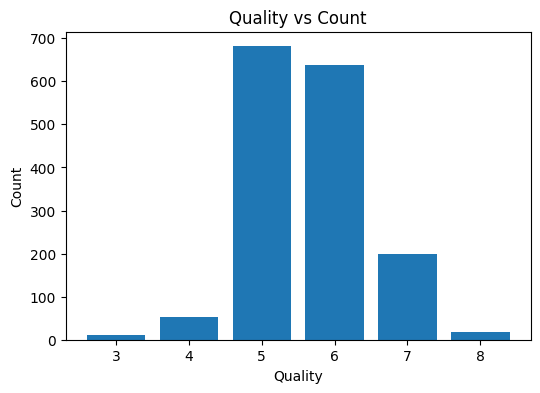

In [9]:
counts = data['quality'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Quality vs Count")
plt.show()

In [10]:
simple_train_data = data[:1200]
simple_test_data = data[1201:]


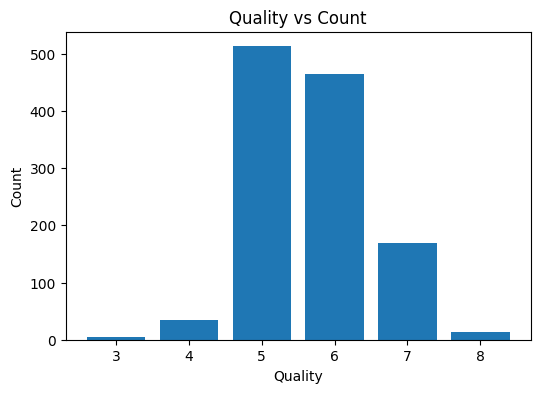

In [11]:
counts = simple_train_data['quality'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Quality vs Count")
plt.show()

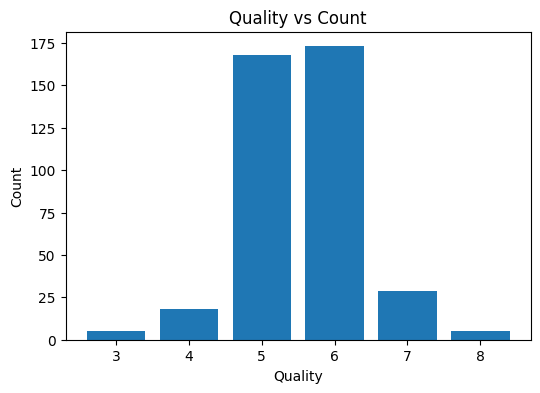

In [12]:
counts = simple_test_data['quality'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel("Quality")
plt.ylabel("Count")
plt.title("Quality vs Count")
plt.show()

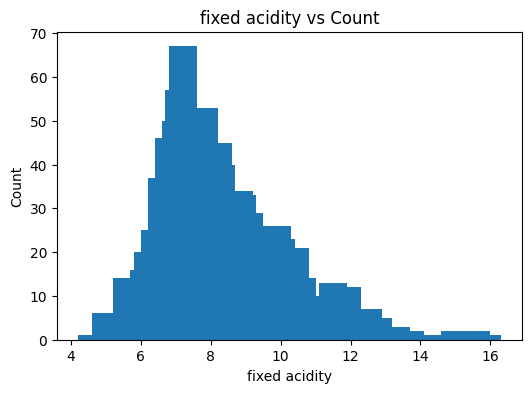

In [13]:
counts = data[features_list[0]].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[0])
plt.ylabel("Count")
plt.title(f"{features_list[0]} vs Count")
plt.show()

volatile acidity
0.120     3
0.160     2
0.180    10
0.190     2
0.200     3
         ..
1.180     1
1.185     1
1.240     1
1.330     2
1.580     1
Name: count, Length: 143, dtype: int64


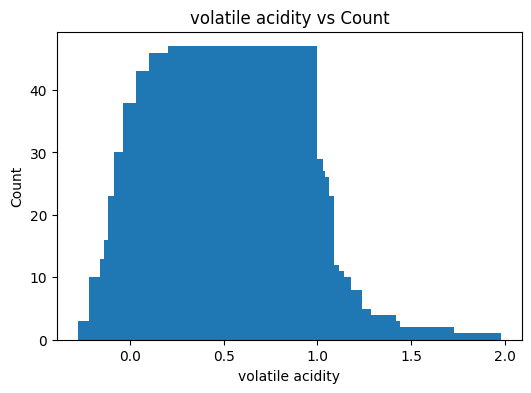

In [14]:
counts = data[features_list[1]].value_counts().sort_index()
print(counts)

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[1])
plt.ylabel("Count")
plt.title(f"{features_list[1]} vs Count")
plt.show()

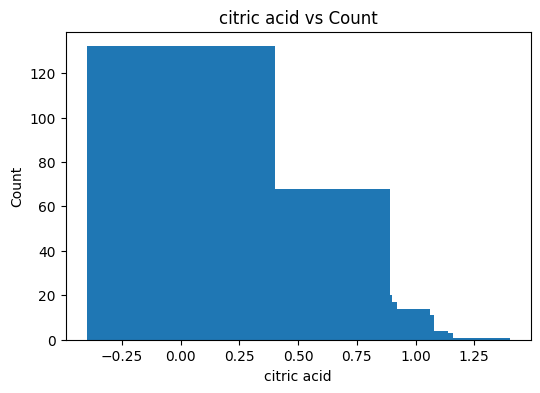

In [15]:
counts = data[features_list[2]].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[2])
plt.ylabel("Count")
plt.title(f"{features_list[2]} vs Count")
plt.show()

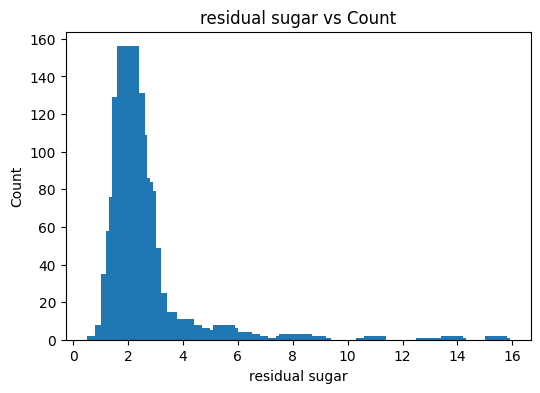

In [16]:
counts = data[features_list[3]].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[3])
plt.ylabel("Count")
plt.title(f"{features_list[3]} vs Count")
plt.show()

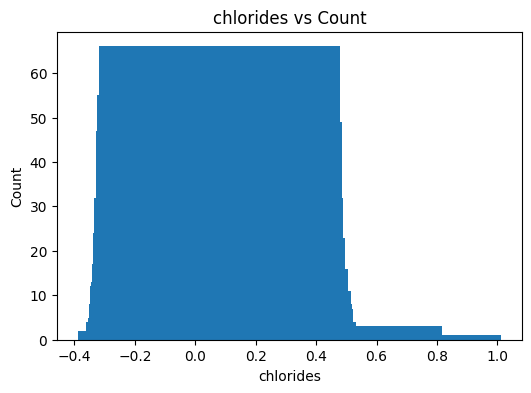

In [17]:
counts = data[features_list[4]].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[4])
plt.ylabel("Count")
plt.title(f"{features_list[4]} vs Count")
plt.show()

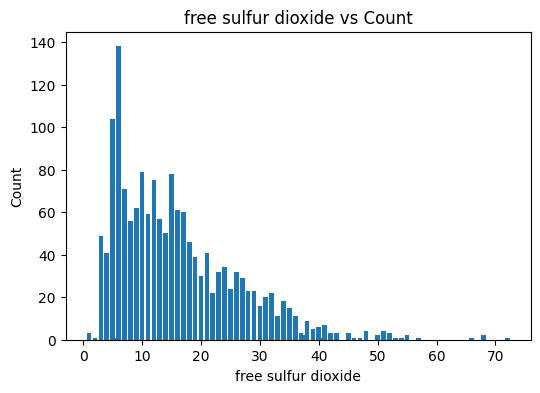

In [18]:
counts = data[features_list[5]].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[5])
plt.ylabel("Count")
plt.title(f"{features_list[5]} vs Count")
plt.show()

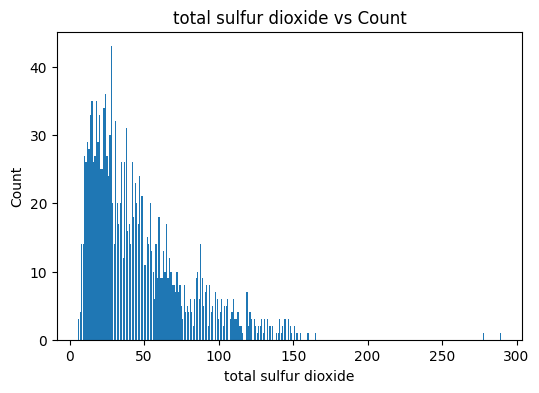

In [19]:
counts = data[features_list[6]].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[6])
plt.ylabel("Count")
plt.title(f"{features_list[6]} vs Count")
plt.show()

density
0.99007    2
0.99020    1
0.99064    2
0.99080    1
0.99084    1
          ..
1.00260    2
1.00289    1
1.00315    3
1.00320    1
1.00369    2
Name: count, Length: 436, dtype: int64


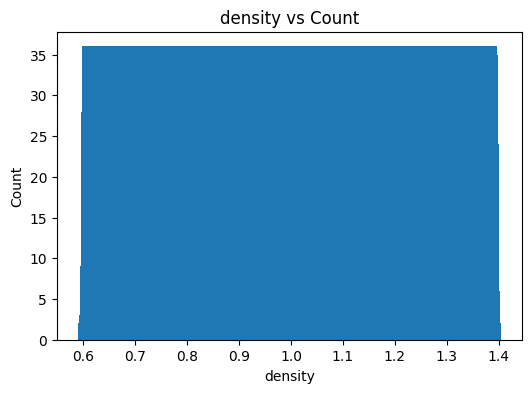

In [20]:
counts = data[features_list[7]].value_counts().sort_index()
print(counts)

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[7])
plt.ylabel("Count")
plt.title(f"{features_list[7]} vs Count")
plt.show()


Random Sampling

In [21]:
def split_train_test(data, test_ratio):
# set the random seed.
    np.random.seed(42)

    # shuffle the dataset.
    shuffled_indices = np.random.permutation(len(data))
    
    # calculate the size of the test set.
    test_set_size = int(len(data) * test_ratio)
    
    # split dataset to get training and test sets.
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [22]:
own_train_data,own_test_data = split_train_test(data,0.2)

In [23]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [24]:
 split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
 for train_index, test_index in split.split(data, data["quality"]):
   strat_train_set = data.loc[train_index]
   strat_test_set = data.loc[test_index]

In [25]:
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set)

overall_dist = data["quality"].value_counts() / len(data)

quality
3      8
4     42
5    545
6    510
7    159
8     15
Name: count, dtype: int64


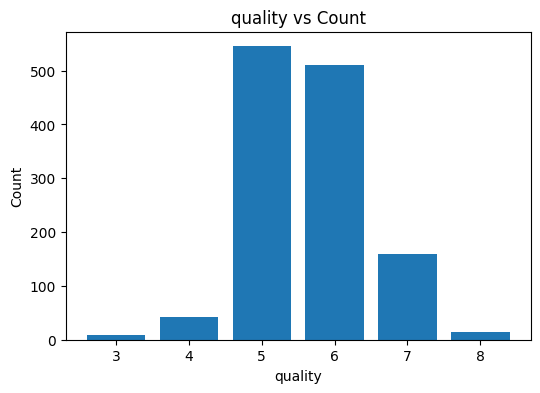

In [26]:
counts = strat_train_set[features_list[11]].value_counts().sort_index()
print(counts)

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.xlabel(features_list[11])
plt.ylabel("Count")
plt.title(f"{features_list[11]} vs Count")
plt.show()


In [27]:
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist})
dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)'])/dist_comparison['overall']

print(dist_comparison)

          overall  stratified  diff(s-o)  diff(s-o)_pct
quality                                                
5        0.425891    0.425000  -0.000891      -0.209251
6        0.398999    0.400000   0.001001       0.250784
7        0.124453    0.125000   0.000547       0.439698
4        0.033146    0.034375   0.001229       3.708726
8        0.011257    0.009375  -0.001882     -16.718750
3        0.006254    0.006250  -0.000004      -0.062500


In [28]:
random_dist = test_set["quality"].value_counts() / len(test_set)
random_dist


quality
6    0.412500
5    0.406250
7    0.131250
4    0.031250
8    0.015625
3    0.003125
Name: count, dtype: float64

In [29]:

simple_dist = simple_test_data["quality"].value_counts() / len(simple_test_data)
simple_dist

quality
6    0.434673
5    0.422111
7    0.072864
4    0.045226
8    0.012563
3    0.012563
Name: count, dtype: float64

In [30]:
dist_comparison = pd.DataFrame({'overall': overall_dist, 'stratified': strat_dist,'random':random_dist,'simple':simple_dist})
dist_comparison

,overall,stratified,random,simple
quality,,,,
3,0.006254,0.006250,0.003125,0.012563
4,0.033146,0.034375,0.031250,0.045226
5,0.425891,0.425000,0.406250,0.422111
6,0.398999,0.400000,0.412500,0.434673
7,0.124453,0.125000,0.131250,0.072864
8,0.011257,0.009375,0.015625,0.012563


In [31]:
dist_comparison['diff(r-o)'] = dist_comparison['random'] - dist_comparison['overall']
dist_comparison['diff(r-o)_pct'] = 100*(dist_comparison['diff(r-o)'])/dist_comparison['overall']

dist_comparison['diff(s-o)'] = dist_comparison['stratified'] - dist_comparison['overall']
dist_comparison['diff(s-o)_pct'] = 100*(dist_comparison['diff(s-o)'])/dist_comparison['overall']

dist_comparison['diff(sim-o)'] = dist_comparison['simple'] - dist_comparison['overall']
dist_comparison['diff(sim-o)_pct'] = 100*(dist_comparison['diff(sim-o)'])/dist_comparison['overall']

dist_comparison

,overall,stratified,random,simple,diff(r-o),diff(r-o)_pct,diff(s-o),diff(s-o)_pct,diff(sim-o),diff(sim-o)_pct
quality,,,,,,,,,,
3,0.006254,0.006250,0.003125,0.012563,-0.003129,-50.031250,-0.000004,-0.062500,0.006309,100.879397
4,0.033146,0.034375,0.031250,0.045226,-0.001896,-5.719340,0.001229,3.708726,0.012080,36.446383
5,0.425891,0.425000,0.406250,0.422111,-0.019641,-4.611784,-0.000891,-0.209251,-0.003781,-0.887698
6,0.398999,0.400000,0.412500,0.434673,0.013501,3.383621,0.001001,0.250784,0.035674,8.940864
7,0.124453,0.125000,0.131250,0.072864,0.006797,5.461683,0.000547,0.439698,-0.051588,-41.452236
8,0.011257,0.009375,0.015625,0.012563,0.004368,38.802083,-0.001882,-16.718750,0.001306,11.599665


DATA Exploration

In [32]:
exploration_set = strat_train_set.copy()
exploration_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1542,6.7,0.855,0.02,1.9,0.064,29.0,38.0,0.99472,3.30,0.56,10.75,6
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.50,5
344,11.9,0.570,0.50,2.6,0.082,6.0,32.0,1.00060,3.12,0.78,10.70,6
924,8.6,0.470,0.27,2.3,0.055,14.0,28.0,0.99516,3.18,0.80,11.20,5
971,10.4,0.260,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.90,6


<Axes: xlabel='fixed acidity', ylabel='density'>

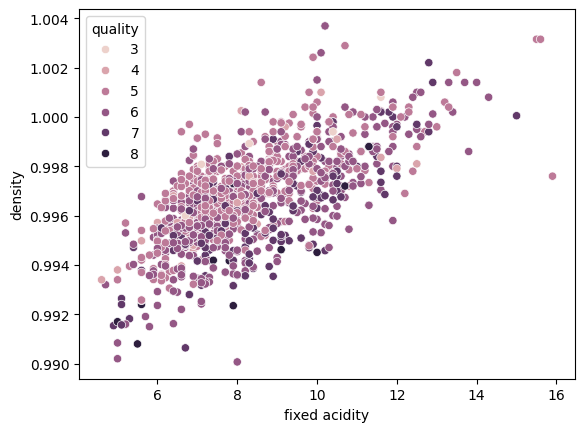

In [33]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality', data=exploration_set)

<Axes: xlabel='citric acid', ylabel='alcohol'>

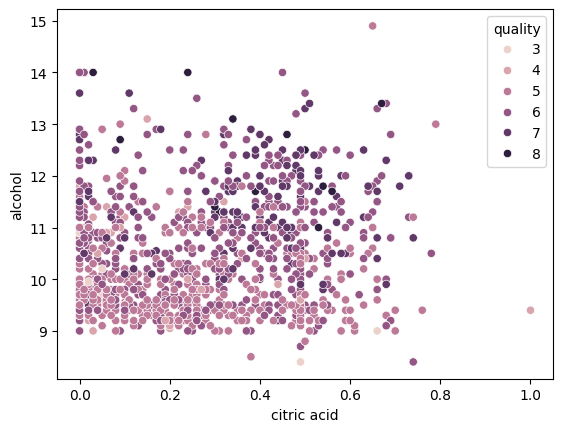

In [34]:
sns.scatterplot(x='citric acid', y='alcohol', hue='quality', data=exploration_set)

<Axes: xlabel='fixed acidity', ylabel='density'>

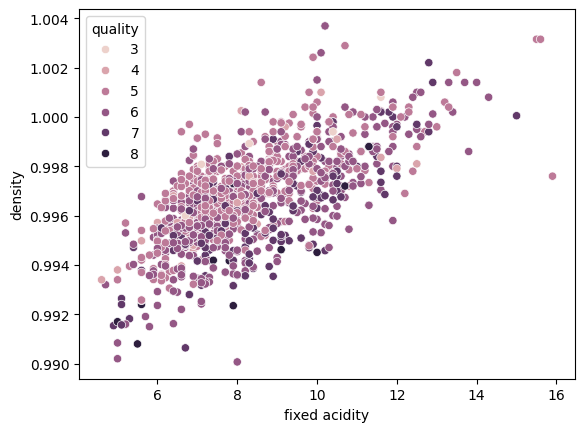

In [35]:
sns.scatterplot(x='fixed acidity', y='density', hue='quality', data=exploration_set)

<Axes: xlabel='citric acid', ylabel='density'>

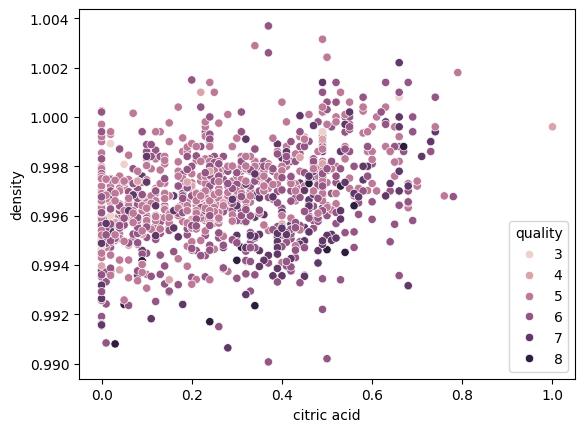

In [36]:
sns.scatterplot(x='citric acid', y='density', hue='quality', data=exploration_set)

<Axes: xlabel='residual sugar', ylabel='density'>

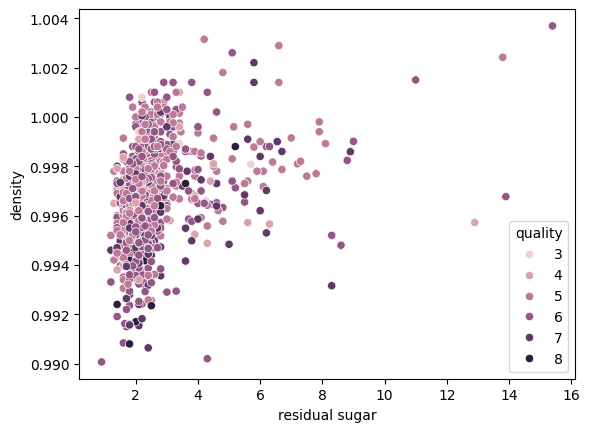

In [37]:
sns.scatterplot(x='residual sugar', y='density', hue='quality', data=exploration_set)

<Axes: xlabel='chlorides', ylabel='density'>

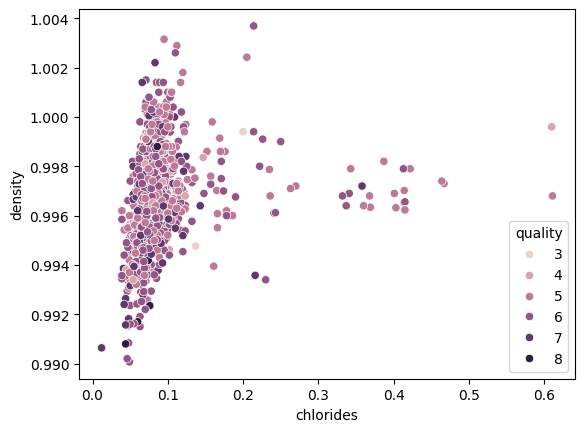

In [38]:
sns.scatterplot(x='chlorides', y='density', hue='quality', data=exploration_set)

<Axes: xlabel='chlorides', ylabel='residual sugar'>

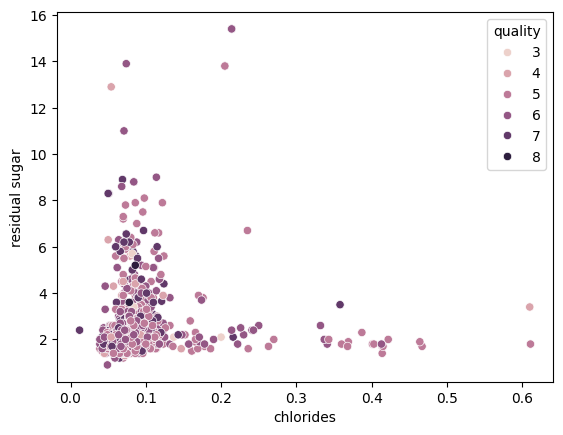

In [39]:
sns.scatterplot(x='chlorides', y='residual sugar', hue='quality', data=exploration_set)

<Axes: xlabel='free sulfur dioxide', ylabel='density'>

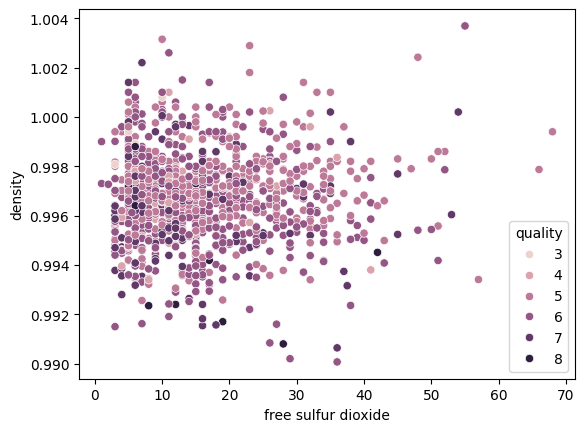

In [40]:
sns.scatterplot(x='free sulfur dioxide', y='density', hue='quality', data=exploration_set)

<Axes: xlabel='total sulfur dioxide', ylabel='density'>

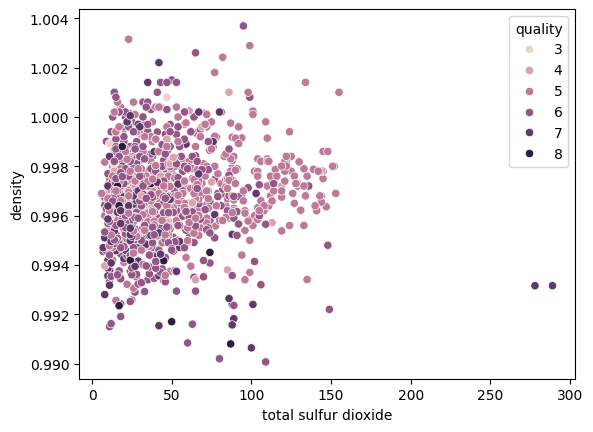

In [41]:
sns.scatterplot(x='total sulfur dioxide', y='density', hue='quality', data=exploration_set)

<Axes: xlabel='pH', ylabel='density'>

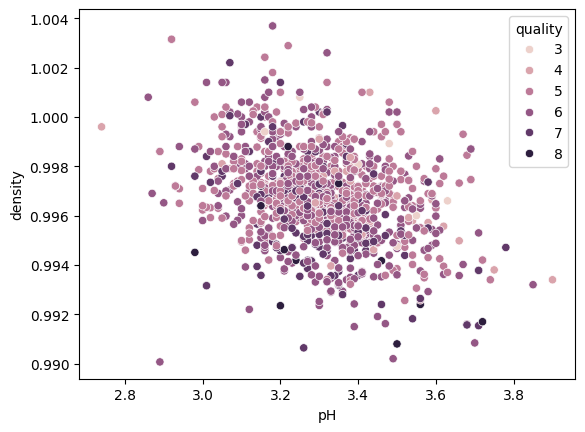

In [42]:
sns.scatterplot(x='pH', y='density', hue='quality', data=exploration_set)

<Axes: xlabel='alcohol', ylabel='density'>

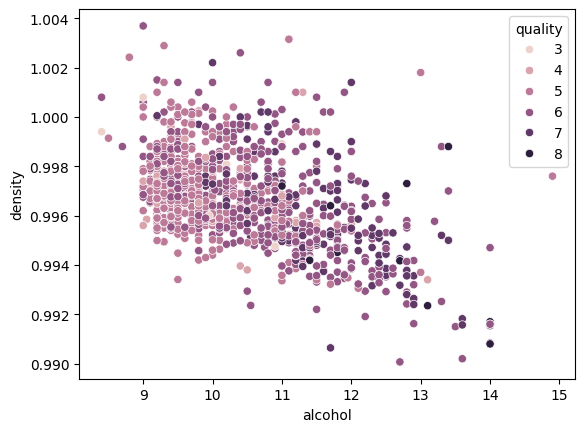

In [43]:
sns.scatterplot(x='alcohol', y='density', hue='quality', data=exploration_set)

<Axes: xlabel='fixed acidity', ylabel='density'>

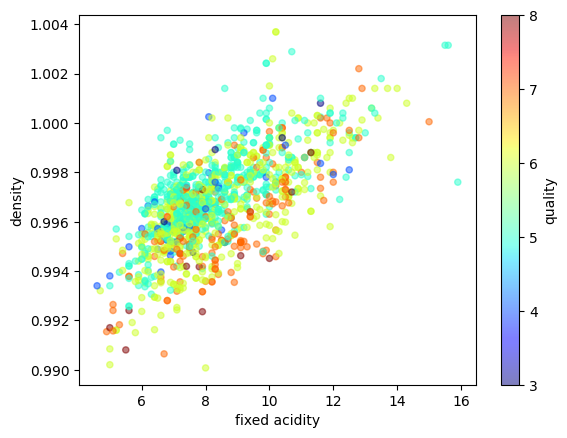

In [44]:
exploration_set.plot(kind='scatter', x='fixed acidity', y='density', alpha=0.5, c="quality", cmap=plt.get_cmap("jet"))

<Axes: xlabel='alcohol', ylabel='density'>

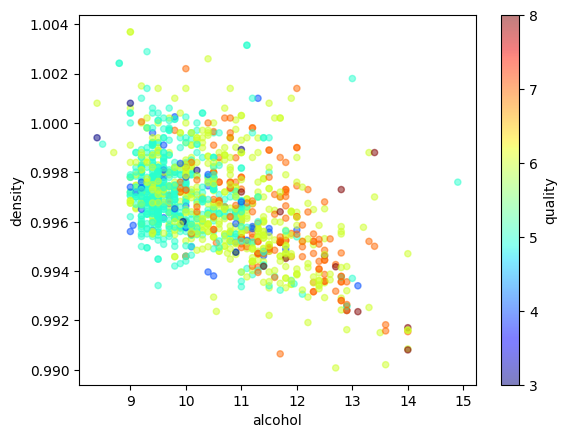

In [45]:
exploration_set.plot(kind='scatter', x='alcohol', y='density', alpha=0.5, c="quality", cmap=plt.get_cmap("jet"))

<Axes: xlabel='residual sugar', ylabel='density'>

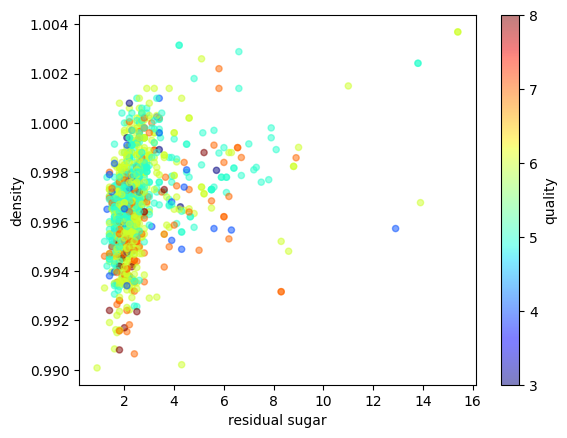

In [46]:
exploration_set.plot(kind='scatter', x='residual sugar', y='density', alpha=0.5, c="quality", cmap=plt.get_cmap("jet"))

<Axes: xlabel='pH', ylabel='density'>

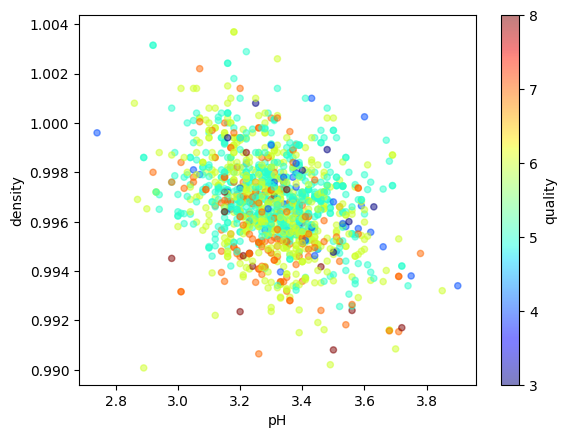

In [47]:
exploration_set.plot(kind='scatter', x='pH', y='density', alpha=0.5, c="quality", cmap=plt.get_cmap("jet"))

<Axes: xlabel='fixed acidity', ylabel='density'>

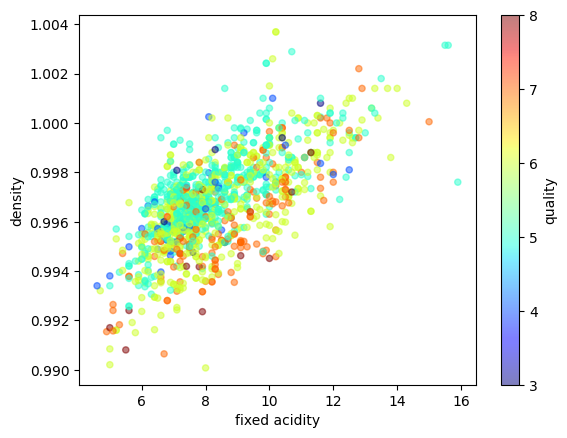

In [48]:
exploration_set.plot(kind='scatter', x='fixed acidity', y='density', alpha=0.5, c="quality", cmap=plt.get_cmap("jet"))

In [49]:
corr_matrix = exploration_set.corr()
corr_matrix['quality']

fixed acidity           0.107940
volatile acidity       -0.383249
citric acid             0.210802
residual sugar          0.003710
chlorides              -0.120231
free sulfur dioxide    -0.048291
total sulfur dioxide   -0.194511
density                -0.193009
pH                     -0.052063
sulphates               0.228050
alcohol                 0.481197
quality                 1.000000
Name: quality, dtype: float64

<Axes: >

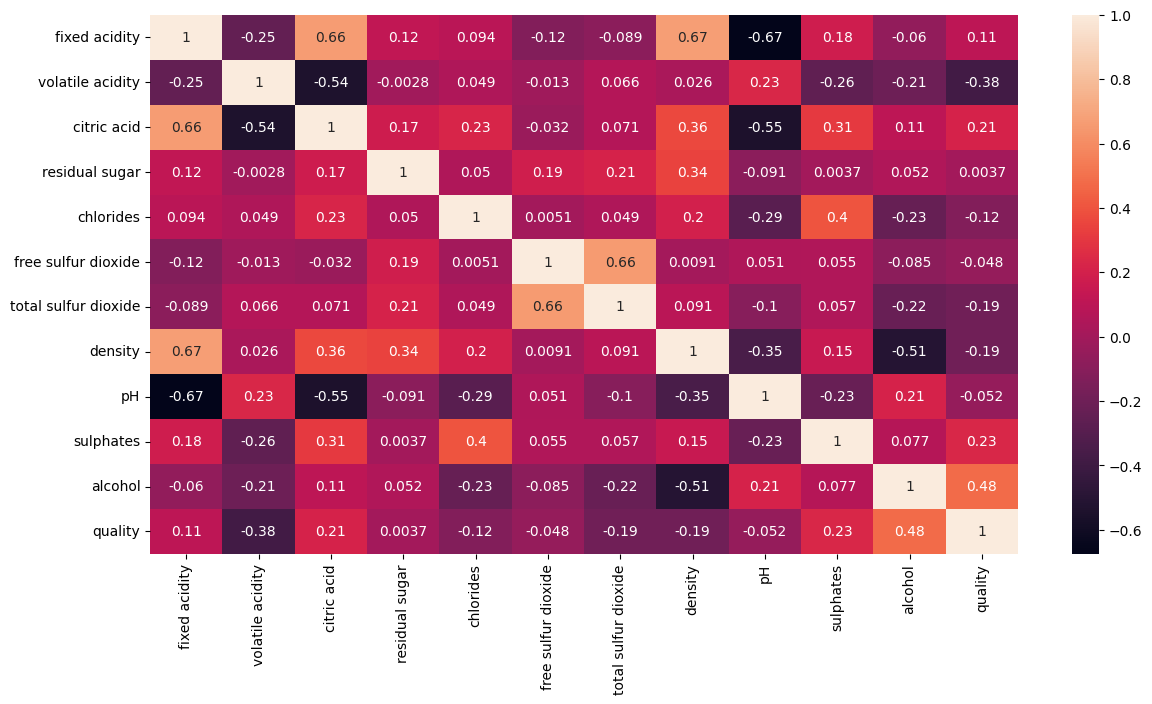

In [50]:
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True)

array([[<Axes: xlabel='fixed acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='fixed acidity'>,
        <Axes: xlabel='citric acid', ylabel='fixed acidity'>,
        <Axes: xlabel='residual sugar', ylabel='fixed acidity'>,
        <Axes: xlabel='chlorides', ylabel='fixed acidity'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='fixed acidity'>,
        <Axes: xlabel='density', ylabel='fixed acidity'>,
        <Axes: xlabel='pH', ylabel='fixed acidity'>,
        <Axes: xlabel='sulphates', ylabel='fixed acidity'>,
        <Axes: xlabel='alcohol', ylabel='fixed acidity'>,
        <Axes: xlabel='quality', ylabel='fixed acidity'>],
       [<Axes: xlabel='fixed acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='volatile acidity', ylabel='volatile acidity'>,
        <Axes: xlabel='citric acid', ylabel='volatile acidity'>,
        <Axes: xlabel='residual sugar', ylabel='vol

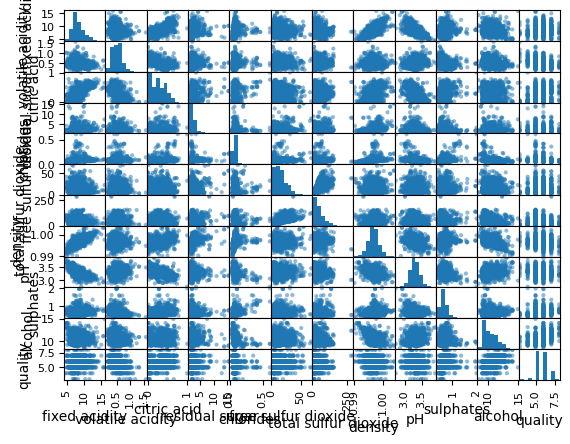

In [51]:
attribute_list = ['citric acid', 'pH', 'alcohol', 'sulphates', 'quality']
scatter_matrix(exploration_set[features_list])

Data Preparation

In [52]:
wine_features = strat_train_set.drop("quality", axis=1)
wine_labels = strat_train_set['quality'].copy()

In [53]:
wine_features.shape

(1279, 11)

In [54]:
lin_reg = LinearRegression()
lin_reg.fit(wine_features, wine_labels)


LinearRegression()

In [55]:
quality_predictions = lin_reg.predict(wine_features)

In [56]:
mean_squared_error(wine_labels, quality_predictions)

0.4206571060060278

In [57]:
wine_features_test = strat_test_set.drop("quality", axis=1)
wine_labels_test = strat_test_set['quality'].copy()

In [58]:
quality_test_predictions = lin_reg.predict(wine_features_test)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.40636065372564384

Text(0, 0.5, 'Predicted quality')

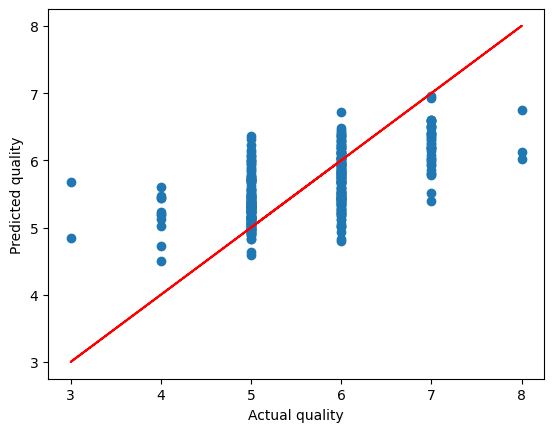

In [59]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

# Decision Tree

In [60]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features, wine_labels)

DecisionTreeRegressor()

In [61]:
quality_predictions = tree_reg.predict(wine_features)

quality_predictions

array([6., 5., 6., ..., 5., 5., 6.])

In [62]:
mean_squared_error(wine_labels, quality_predictions)

0.0

Overfitting on training data

In [63]:
quality_test_predictions = tree_reg.predict(wine_features_test)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.534375

In [64]:
tree = tree_reg.tree_
first_feature_index = tree.feature[0]
first_feature_label = wine_features_test.columns[first_feature_index]

print("First split feature label:", first_feature_label)


First split feature label: alcohol


Text(0, 0.5, 'Predicted quality')

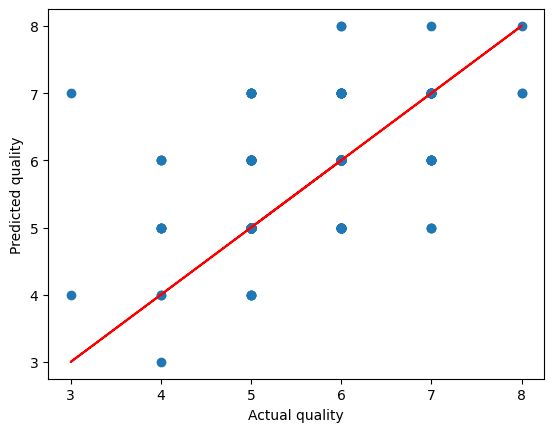

In [65]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

Validatio

In [66]:
scores = cross_val_score(lin_reg, wine_features, wine_labels, scoring="neg_mean_squared_error", cv=10)

lin_reg_mse_scores = -scores

lin_reg_mse_scores

array([0.56364537, 0.4429824 , 0.38302744, 0.40166681, 0.29687635,
       0.37322622, 0.33184855, 0.50182048, 0.51661311, 0.50468542])

In [67]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_reg_mse_scores)

Scores: [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean: 0.4316392172121959
Standard deviation: 0.08356359730413956


In [68]:
scores = cross_val_score(tree_reg, wine_features, wine_labels, scoring="neg_mean_squared_error", cv=10)

tree_mse_scores = -scores

display_scores(tree_mse_scores)

Scores: [0.640625   0.7109375  0.609375   0.5        0.4609375  0.6328125
 0.6328125  0.71875    0.859375   1.02362205]
Mean: 0.6789247047244095
Standard deviation: 0.15623015434061555


# Random Forest

In [69]:
forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features, wine_labels)

RandomForestRegressor()

In [70]:
scores = cross_val_score(forest_reg, wine_features, wine_labels, scoring="neg_mean_squared_error", cv=10)

ran_forest_mse_scores = -scores

display_scores(ran_forest_mse_scores)

Scores: [0.37084922 0.41249609 0.29345    0.31765234 0.21682422 0.30008125
 0.27196016 0.38685391 0.4223875  0.46190472]
Mean: 0.3454459411909449
Standard deviation: 0.07335942062061437


In [71]:
quality_test_predictions = forest_reg.predict(wine_features_test)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.3196965625

Text(0, 0.5, 'Predicted quality')

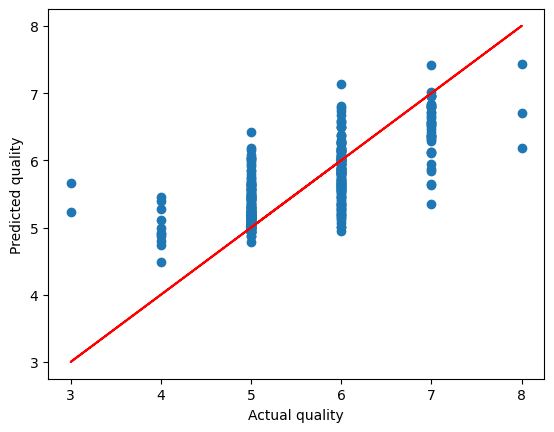

In [72]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')

In [73]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [74]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)

# Grid searchCV

In [75]:
grid_search.fit(wine_features, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [76]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [77]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)

0.5092269199346405 {'max_features': 2, 'n_estimators': 3}
0.3841118566176471 {'max_features': 2, 'n_estimators': 10}
0.3585598039215686 {'max_features': 2, 'n_estimators': 30}
0.4747545615468409 {'max_features': 4, 'n_estimators': 3}
0.3823586397058823 {'max_features': 4, 'n_estimators': 10}
0.36869241217320264 {'max_features': 4, 'n_estimators': 30}
0.47588133169934643 {'max_features': 6, 'n_estimators': 3}
0.3906501225490196 {'max_features': 6, 'n_estimators': 10}
0.3525861315359477 {'max_features': 6, 'n_estimators': 30}
0.4756906998910675 {'max_features': 8, 'n_estimators': 3}
0.3856558517156863 {'max_features': 8, 'n_estimators': 10}
0.35616785811546836 {'max_features': 8, 'n_estimators': 30}
0.43667926198257073 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.38914414828431376 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4479663671023964 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.3862261642156863 {'bootstrap': False, 'max_features': 

In [78]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [79]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [80]:
sorted(zip(feature_importances, features_list), reverse=True)

[(np.float64(0.2486711653610271), 'alcohol'),
 (np.float64(0.14163642739406354), 'sulphates'),
 (np.float64(0.12665569639367016), 'volatile acidity'),
 (np.float64(0.08045272518319231), 'total sulfur dioxide'),
 (np.float64(0.07275072016325315), 'density'),
 (np.float64(0.05822554296729619), 'citric acid'),
 (np.float64(0.05791188978825248), 'chlorides'),
 (np.float64(0.057124416693656116), 'pH'),
 (np.float64(0.056416454671447944), 'residual sugar'),
 (np.float64(0.05388861091468478), 'fixed acidity'),
 (np.float64(0.04626635046945642), 'free sulfur dioxide')]

In [81]:
wine_features_test = strat_test_set.drop("quality", axis=1)

In [82]:
wine_labels_test = strat_test_set['quality'].copy()

In [83]:
wine_labels_test = strat_test_set['quality'].copy()

In [84]:
transform_pipeline = Pipeline([('imputer', SimpleImputer(strategy="mean")),('std_scaler', StandardScaler())])
wine_features_tr = transform_pipeline.fit_transform(wine_features)

In [85]:
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

In [86]:
quality_test_predictions = grid_search.best_estimator_.predict(wine_features_test_tr)
quality_test_predictions

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4.8       , 4.43333333, 4.43333333, 4.9       , 4.73333333,
       5.46666667, 4.86666667, 4.43333333, 5.53333333, 4.9       ,
       4.66666667, 4.7       , 4.63333333, 4.56666667, 4.73333333,
       4.96666667, 4.13333333, 4.43333333, 5.56666667, 4.9       ,
       4.56666667, 5.2       , 4.9       , 4.36666667, 4.4       ,
       4.6       , 4.6       , 4.86666667, 4.93333333, 4.4       ,
       4.86666667, 4.36666667, 4.36666667, 4.8       , 4.8       ,
       4.7       , 4.26666667, 5.56666667, 4.2       , 4.9       ,
       4.8       , 4.76666667, 4.86666667, 5.2       , 4.73333333,
       5.06666667, 4.73333333, 5.33333333, 4.83333333, 4.76666667,
       4.43333333, 5.43333333, 4.23333333, 4.86666667, 4.86666667,
       4.6       , 4.43333333, 4.86666667, 4.86666667, 4.56666667,
       5.46666667, 4.86666667, 4.86666667, 5.53333333, 4.9       ,
       4.73333333, 5.16666667, 4.86666667, 4.43333333, 4.73333333,
       4.9       , 4.86666667, 4.33333333, 4.3       , 4.56666

In [87]:
mean_squared_error(wine_labels_test, quality_test_predictions)

1.2120520833333335